<a href="https://colab.research.google.com/github/RedaElmar/Griffin/blob/master/the_traveling_salesman_portrait_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the image**
> *this algorithm works best for images with light backgrounds*


In [21]:
!pip install tsp_solver #we'll need this later
import urllib.request  
import os  
image_url = 'https://i.pinimg.com/originals/69/a9/a1/69a9a14ddd2e8141ab5c93308a3ed7fc.jpg'  
image_path = '69a9a14ddd2e8141ab5c93308a3ed7fc.jpg'  
if not os.path.exists(image_path):  
    urllib.request.urlretrieve(image_url, image_path)  

 convert the image to black and white

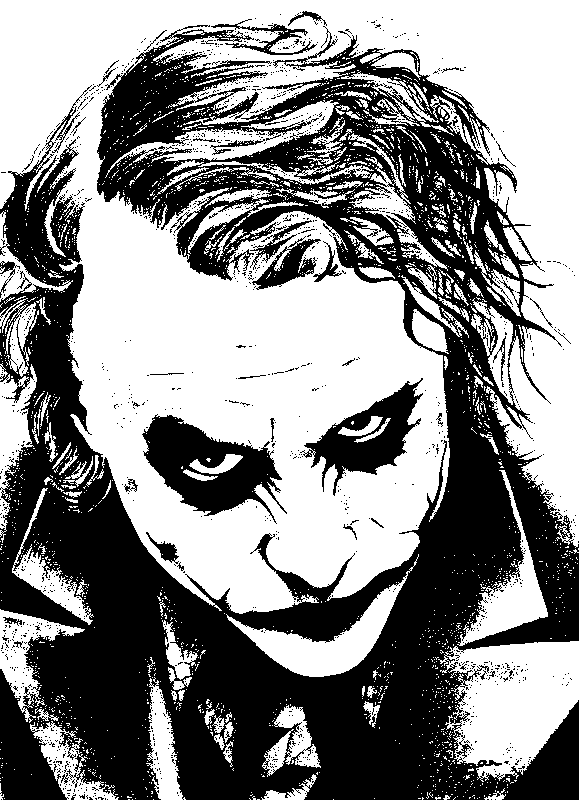

In [22]:
from PIL import Image    
original_image = Image.open(image_path)  
bw_image = original_image.convert('1', dither=Image.NONE)  
bw_image  

**we use NumPy to identify the black pixels and select a random subset of 10000 elements**

([], <a list of 0 Text yticklabel objects>)

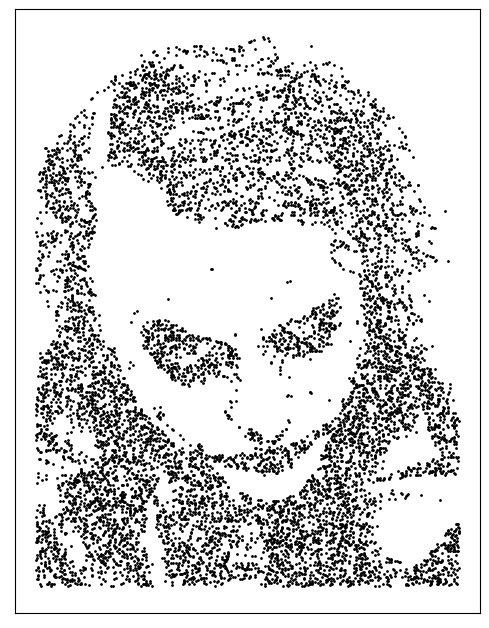

In [23]:
import numpy as np  
import matplotlib.pyplot as plt
bw_image_array = np.array(bw_image, dtype=np.int)  
black_indices = np.argwhere(bw_image_array == 0)  
chosen_black_indices = black_indices[np.random.choice(black_indices.shape[0],replace=False,size=10000)]  
  
plt.figure(figsize=(6, 8), dpi=100)  
plt.scatter([x[1] for x in chosen_black_indices],[x[0] for x in chosen_black_indices],color='black', s=1)  
plt.gca().invert_yaxis()  
plt.xticks([])  
plt.yticks([])  

to solve Traveling Sailesman Problem for those 10000 pixels

**We define the distance between every pixel (distance between two pixels = the Euclidean distance between their x,y coordinates in the image)**

In [0]:
from scipy.spatial.distance import pdist, squareform  
  
distances = pdist(chosen_black_indices)  
distance_matrix = squareform(distances)  

The result is a 10,000 x 10,000 matrix with the Euclidean distances between every pixel.

([], <a list of 0 Text yticklabel objects>)

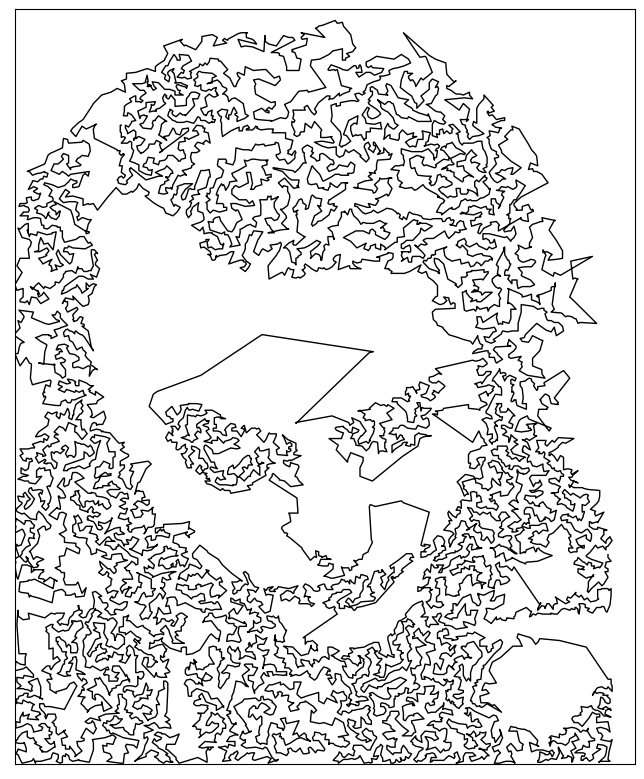

In [25]:
from tsp_solver.greedy_numpy import solve_tsp  
optimized_path = solve_tsp(distance_matrix)  
optimized_path_points = [chosen_black_indices[x] for x in optimized_path]  

plt.figure(figsize=(8, 10), dpi=100)  
plt.plot([x[1] for x in optimized_path_points],  
         [x[0] for x in optimized_path_points],  
         color='black', lw=1)  
plt.xlim(0, 600)  
plt.ylim(0, 800)  
plt.gca().invert_yaxis()  
plt.xticks([])  
plt.yticks([])  

And Here we are... ***WHY SO SERIOUS..??***

([], <a list of 0 Text yticklabel objects>)

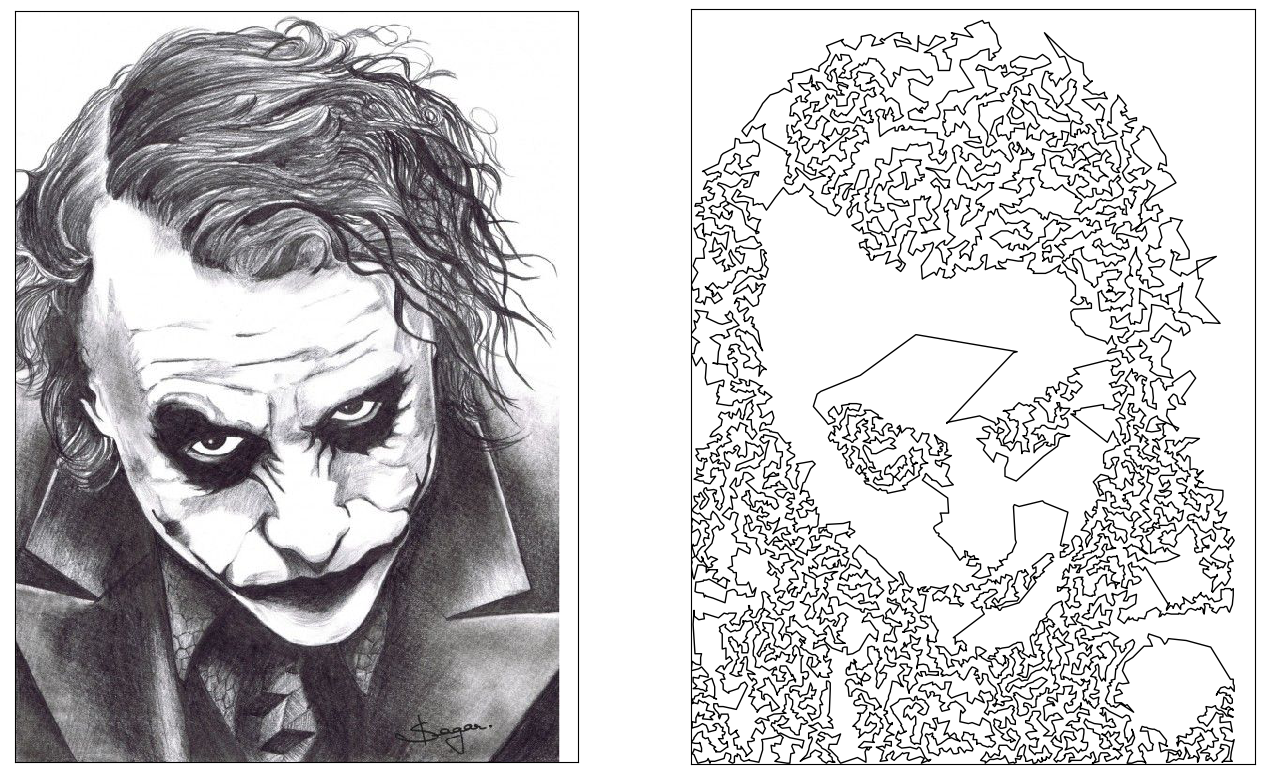

In [26]:
plt.figure(figsize=(16, 10), dpi=100)  
  
plt.subplot(1, 2, 1)  
plt.imshow(original_image)  
plt.grid(False)  
plt.xlim(0, 600)
plt.ylim(0, 800)  
plt.gca().invert_yaxis()  
plt.xticks([])  
plt.yticks([])  
  
plt.subplot(1, 2, 2)  
plt.plot([x[1] for x in optimized_path_points],  
         [x[0] for x in optimized_path_points],  
         color='black', lw=1)  
plt.grid(False)  
plt.xlim(0, 600)  
plt.ylim(0, 800)  
plt.gca().invert_yaxis()  
plt.xticks([])  
plt.yticks([]) 

*A side-by-side comparison*